<a href="https://colab.research.google.com/github/Aditya-Sharma-Aiml/Machine-Learning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



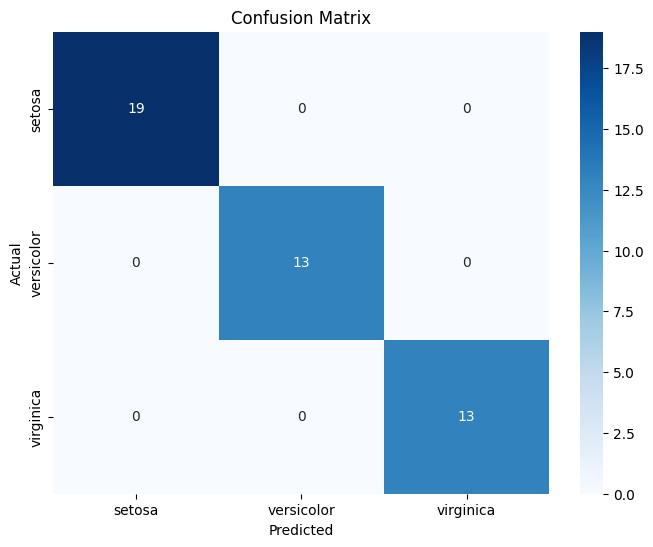

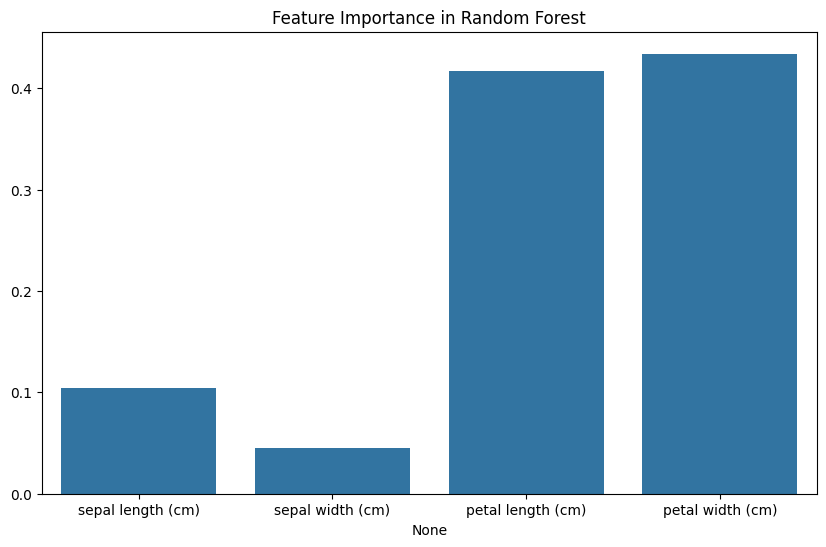

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (Iris dataset for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Feature Importance (Optional)
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance in Random Forest")
plt.show()


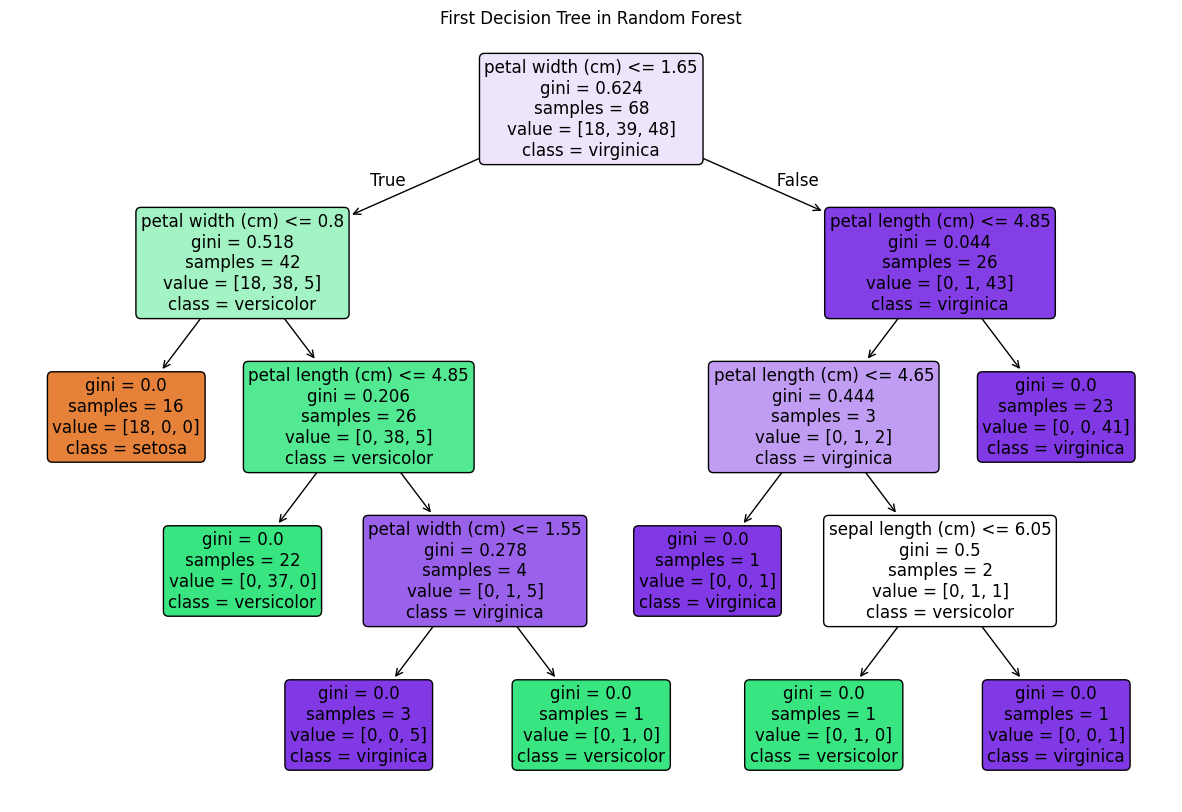

In [ ]:
from sklearn.tree import plot_tree
# Step 9: Visualize the first decision tree in the Random Forest
# Plot the first tree in the Random Forest
plt.figure(figsize=(15, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("First Decision Tree in Random Forest")
plt.show()

In [ ]:
# Get the number of decision trees in the Random Forest
num_trees = len(rf_classifier.estimators_)
print(f"Number of decision trees in the Random Forest: {num_trees}")


Number of decision trees in the Random Forest: 100


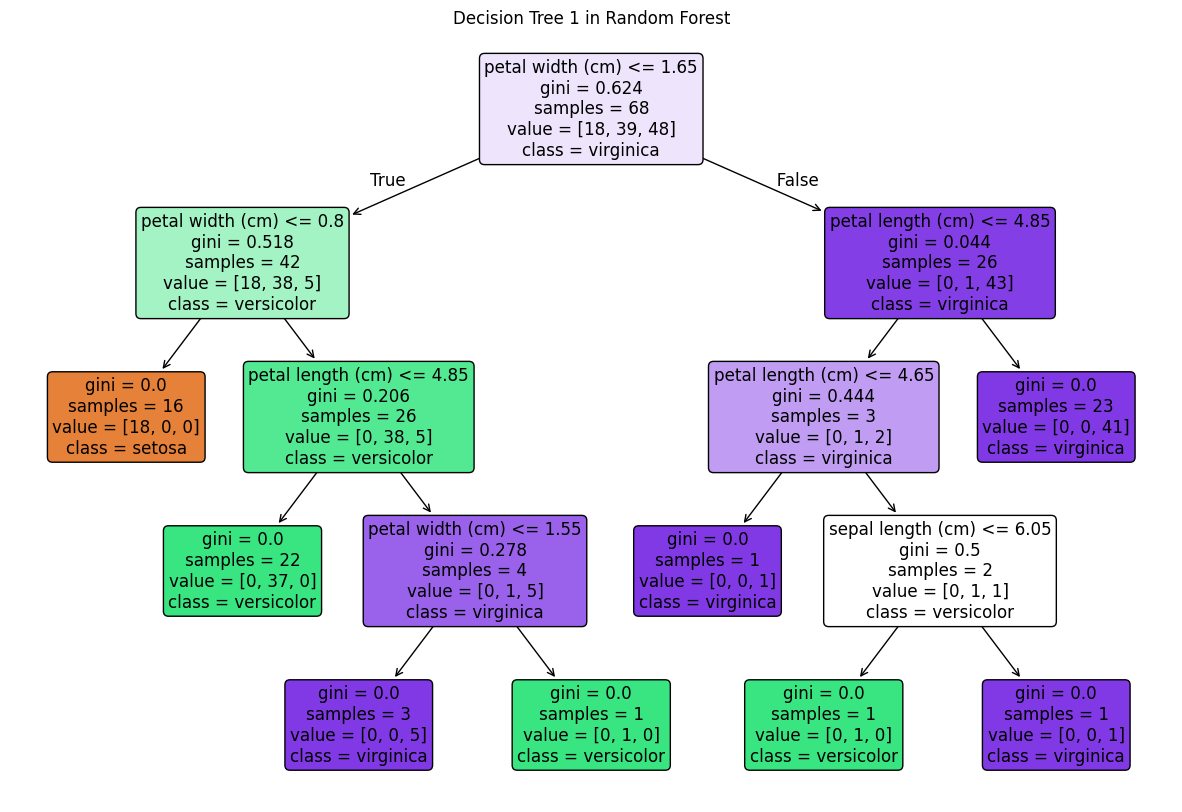

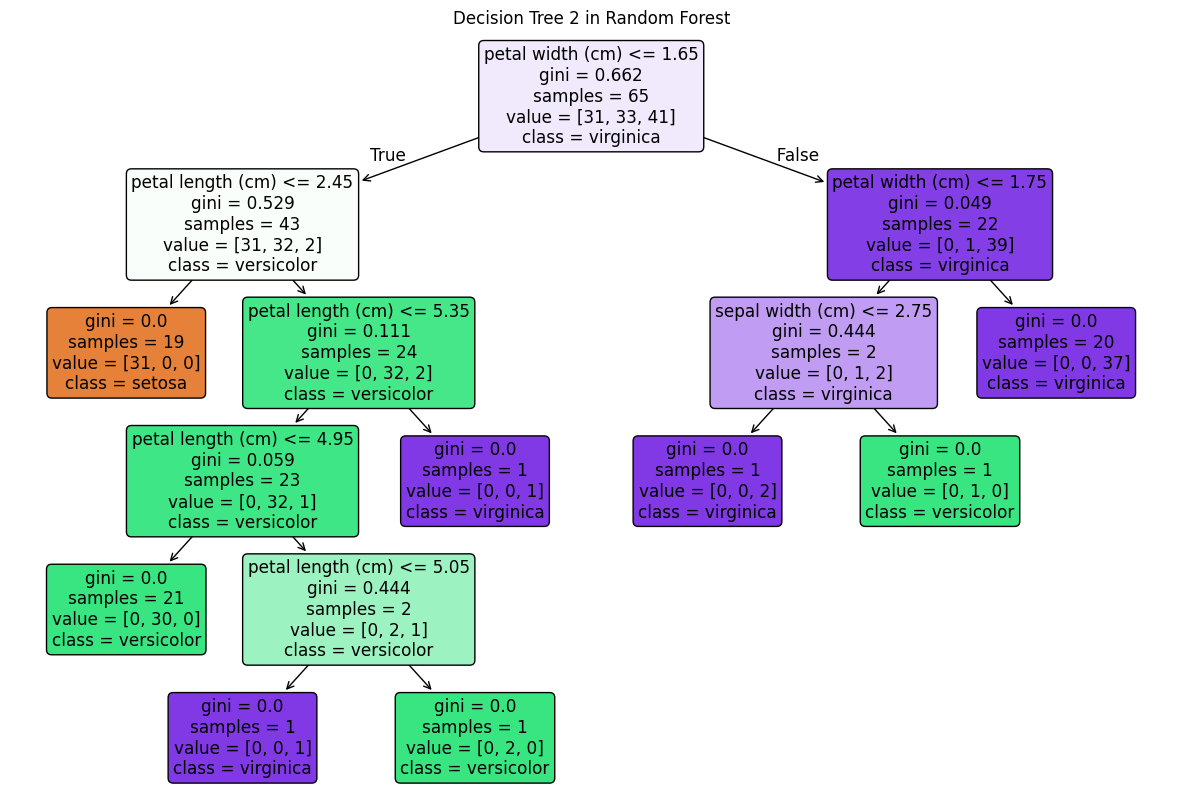

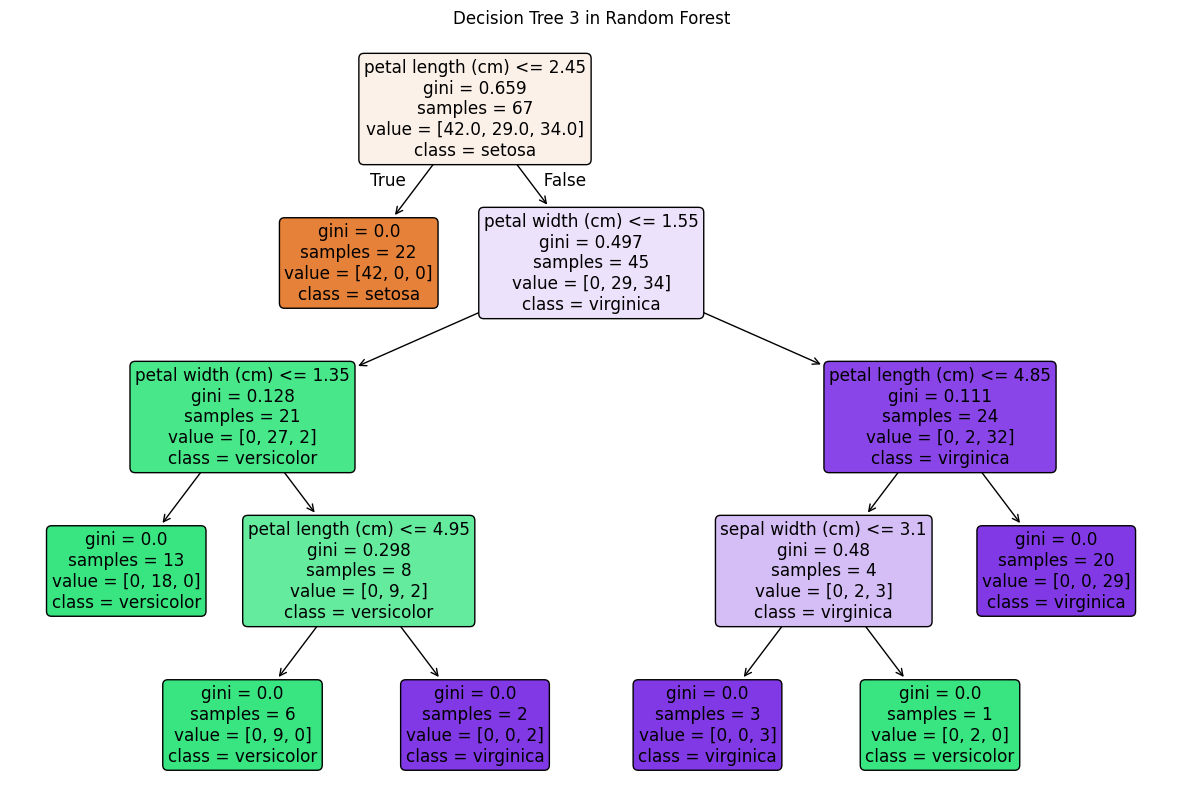

In [ ]:
# Visualizing multiple decision trees (e.g., the first 3 trees)
for i in range(3):
    plt.figure(figsize=(15, 10))
    plot_tree(rf_classifier.estimators_[i], feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
    plt.title(f"Decision Tree {i+1} in Random Forest")
    plt.show()


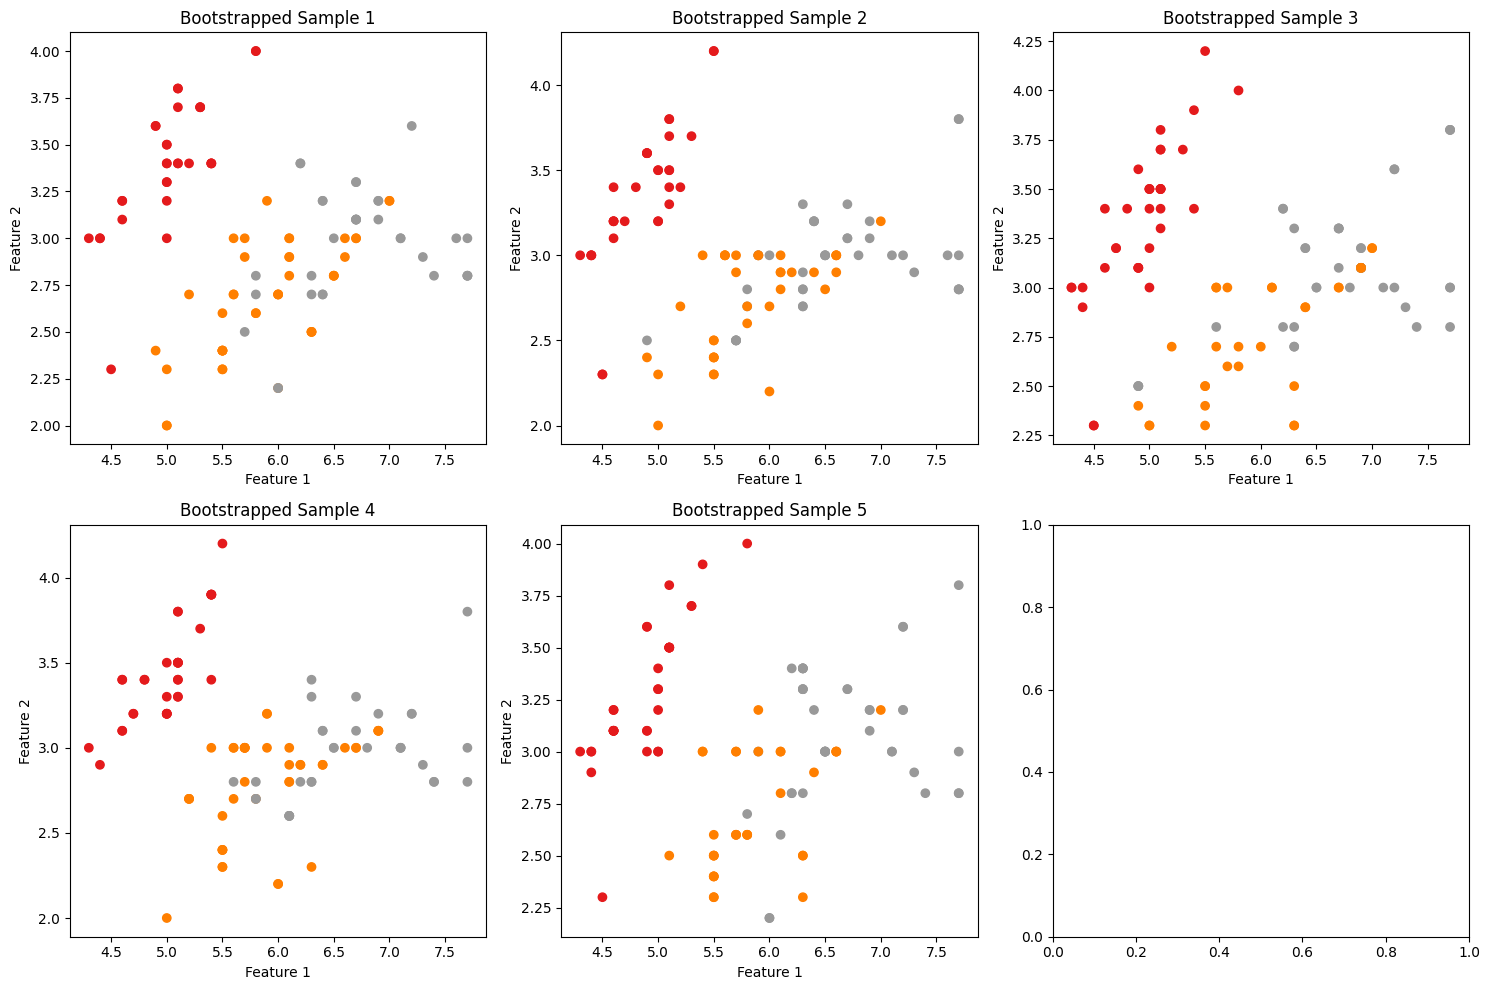

Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


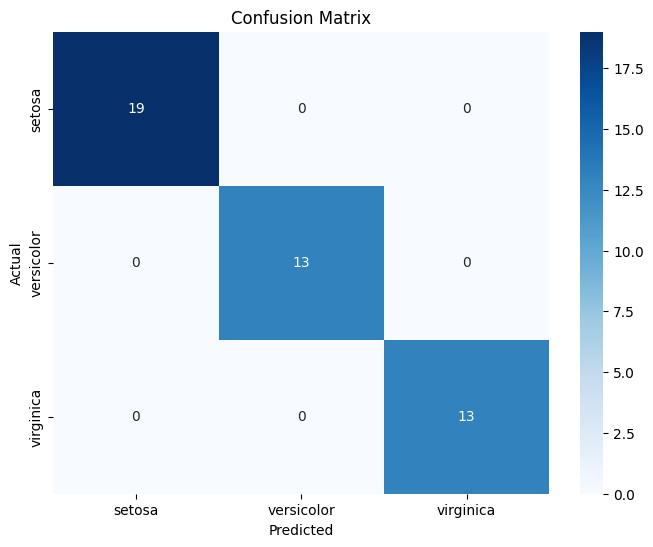

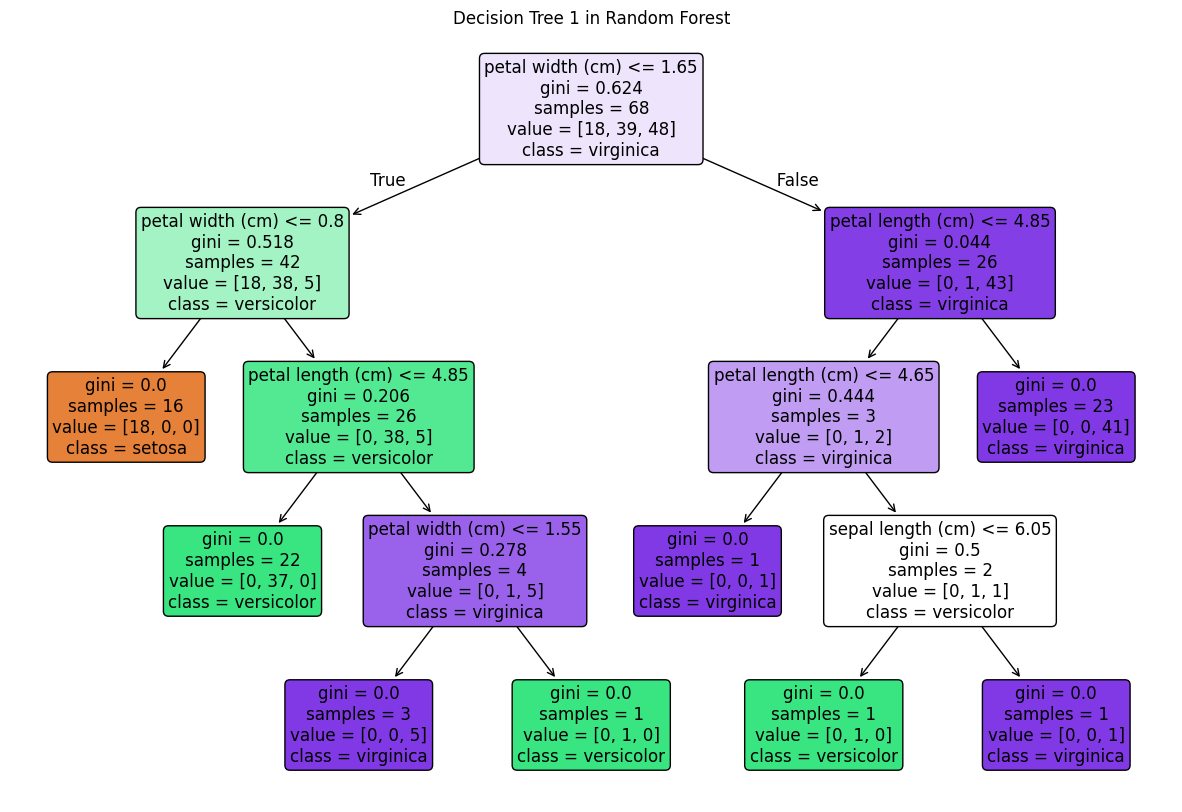

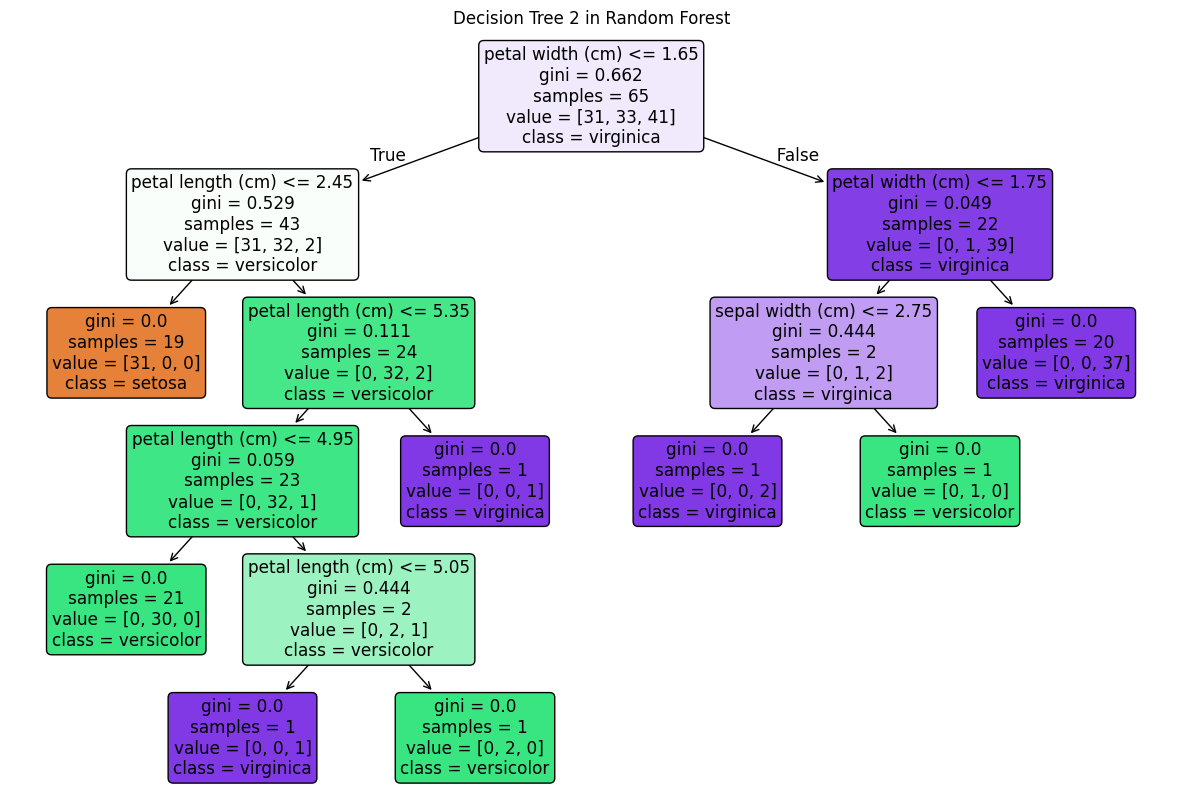

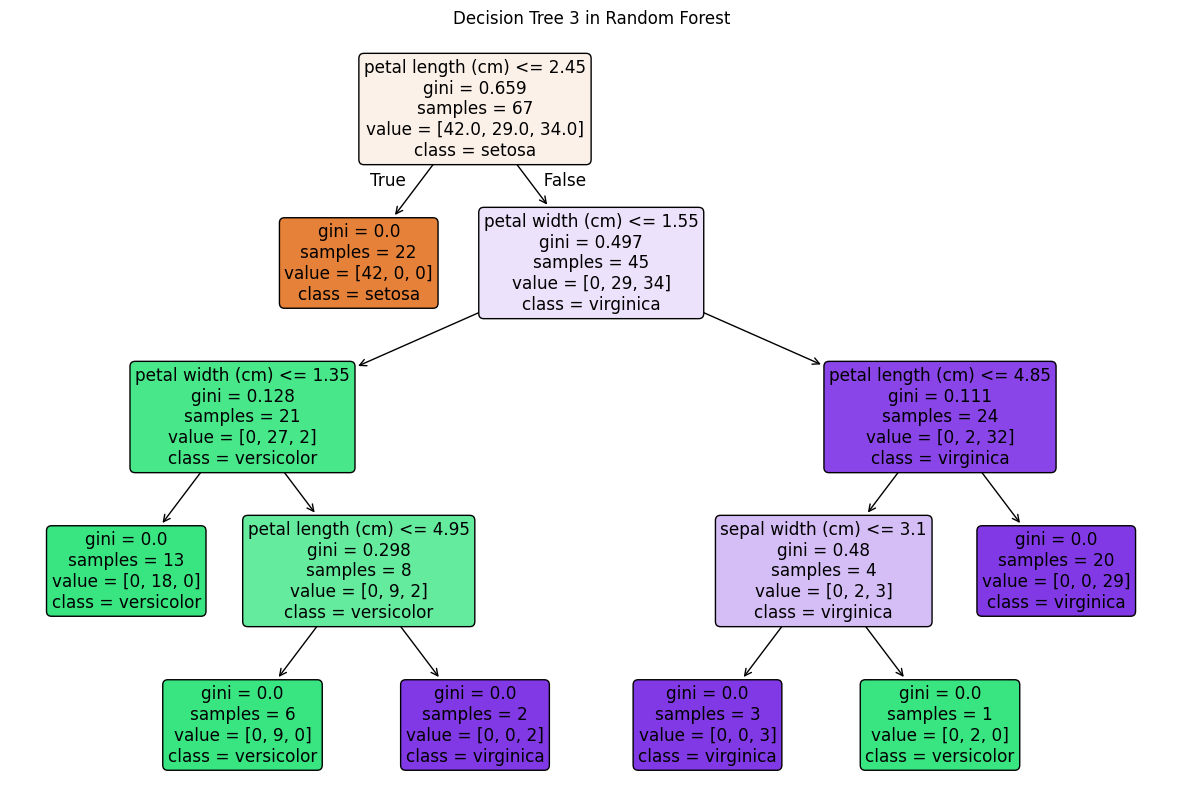

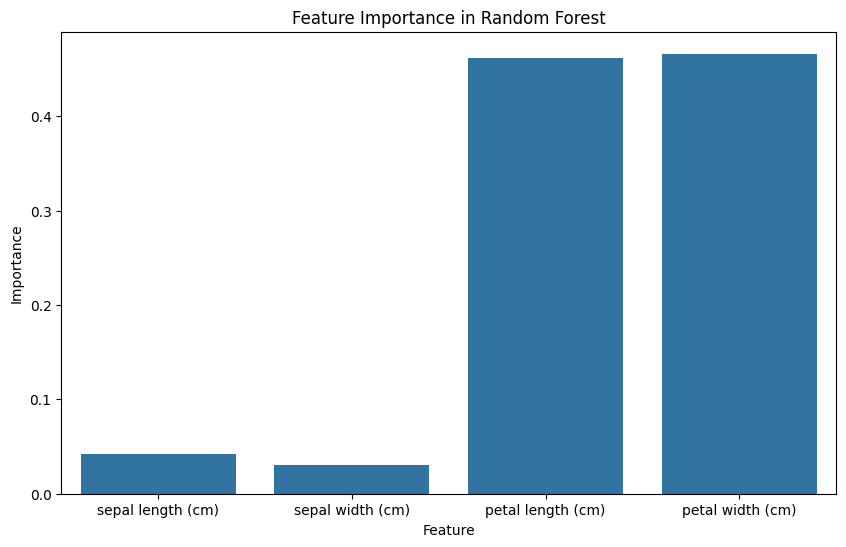

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.utils import resample

# Step 2: Load the dataset (Iris dataset for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize the Random Forest Classifier (with Bagging concept)
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)  # Reduced trees for visualization

# Step 5: Visualize Bootstrapped Samples (Bagging)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in range(5):  # Visualizing bootstrapped samples for 5 trees
    # Generate a bootstrapped sample from training data
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)

    # Plot the resampled dataset (for visualization)
    ax = axes[i // 3, i % 3]
    ax.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], c=y_resampled, cmap=plt.cm.Set1, label="Bootstrapped sample")
    ax.set_title(f"Bootstrapped Sample {i+1}")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Step 6: Train the Random Forest model (Bagging applied)
rf_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 9: Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Visualize the decision trees in the Random Forest
# Visualize the first few decision trees in the Random Forest (to show the effect of Bagging)
for i in range(3):  # Visualizing first 3 decision trees
    plt.figure(figsize=(15, 10))
    plot_tree(rf_classifier.estimators_[i], feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
    plt.title(f"Decision Tree {i+1} in Random Forest")
    plt.show()

# Step 11: Visualize Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title("Feature Importance in Random Forest")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()
